In [1]:
from IPython.display import display, HTML
display(HTML('<style>.container {width: 100%} </style>'))

In [2]:
import pandas as pd
import numpy as np
import random, math

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set_style("darkgrid")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
# Get a list of devices like GPUs and CPUs available to TF
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# device_name = tf.test.gpu_device_name()

# if device_name != '/device:CPU:0':
#     raise SystemError('GPU device not found.')
# print(f'Found GPU at {device_name}')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11234681455267538705
xla_global_id: -1
]


2023-06-21 21:37:57.104344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load MNIST dataset

**Image Format:** The MNIST dataset consists of grayscale images, where each image is a 28x28 pixel square (784 pixels in total). Each pixel represents the intensity of the grayscale, ranging from 0 (white) to 255 (black).

**Training and Testing Sets:** The dataset is typically divided into two sets: a training set and a testing set. The training set contains 60,000 images, while the testing set contains 10,000 images. This division allows researchers and developers to train machine learning models on the training set and evaluate their performance on the testing set.

**Labels:** Each image in the MNIST dataset is associated with a label indicating the corresponding digit (0-9). These labels serve as the ground truth for training and evaluation purposes.

**Applications:** The MNIST dataset is commonly used as a starting point for beginners in the field of machine learning, as it provides a relatively simple and well-structured task. It has been extensively used to develop and benchmark various image classification algorithms, such as convolutional neural networks (CNNs).

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

## Explore data

In [7]:
print("Number of training examples:", len(X_train))
print("Number of test examples:", len(X_test))

Number of training examples: 60000
Number of test examples: 10000


In [8]:
print("Nnumber of pixels in each image :", X_train.shape[1]*X_train.shape[2])

Nnumber of pixels in each image : 784


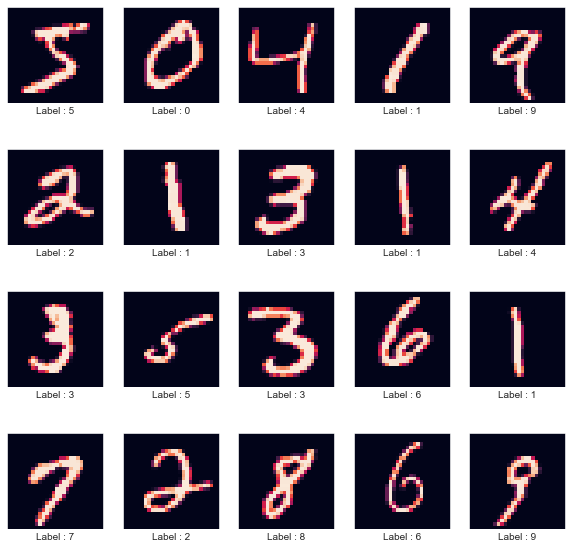

In [9]:
plt.figure(figsize = (10, 10))

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(f'Label : {y_train[i]}')

In [10]:
X_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

## Data Preprocessing

- Preprocess images using Min-Max scaling(most popular with image data)
- Rechape features for training
- Encode target to binary vactors

In [11]:
X_train, X_test = X_train/255, X_test/255

Label : 5



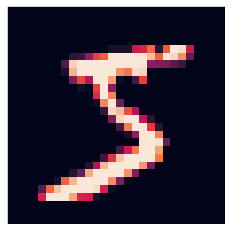

In [12]:
## data after preprocessing
print(f'Label : {y_train[0]}\n')

plt.xticks([])
plt.yticks([])
plt.imshow(X_train[0])
plt.show()

In [13]:
## Reshaping X for trainning
X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

## Reshaping Y for trainning
n_class = 10
y_train_new, y_test_new = np.eye(n_class)[y_train], np.eye(n_class)[y_test]
# y_train_new, y_test_new = tf.one_hot(y_train, n_class), tf.one_hot(y_test, n_class)
# y_train_new, y_test_new = tf.keras.utils.to_categorical(y_train, n_class), utils.to_categorical(y_test, n_class) 


In [14]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334

def plt_dynamic(x, y, y_1, ax, ticks, colors=['b'], title = None):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    # if len(x) ==1:
    plt.legend()
    plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

In [15]:
tf.compat.v1.disable_eager_execution()

## Using Softmax layer for Classification

In [16]:
## Placeholders & Variables

## x is a 2-D tensor, a placeholder which is a memory unit used of shape (None, 784)  to load various mini-batches of imput data while training.
## training such that each 28*28 image is flattened into a 784-dimensional vector. (Here None means that a dimension can be of any length.)
X = tf.compat.v1.placeholder(tf.float32, [None, 784])

## y is the true label of the inputs and is a placeholder
y = tf.compat.v1.placeholder(tf.float32, [None, 10])

## Initialize weights and biases
## A Variable is a modifiable tensor that lives in TensorFlow's graph of interacting operations.
## Usually the model parameters are set as Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [17]:
## First, we multiply X by W with the expression tf.matmul(X, W). 
## We then add b, and finally apply tf.nn.softmax.

## Predictions with Softmax layer
y_pred = tf.nn.softmax(tf.matmul(X, W) + b)

In [18]:
## Defining the loss function: multi class log-loss/cross-entropy
## tf.log computes the logarithm of each element of y. 
## Next, we multiply each element of y_pred with the corresponding element of tf.log(y). 

## Then tf.reduce_sum adds the elements in the second dimension of y, 
## due to the reduction_indices=[1] parameter. 

## Finally, tf.reduce_mean computes the mean over all the examples in the batch.

cross_entropy = tf.math.reduce_mean(- tf.reduce_sum(y* tf.math.log(y_pred), axis= 1))

In [19]:
## In this case, we ask TensorFlow to minimize cross_entropy using gradient descent algorithm with a learning rate of 0.03.
## Behind the scenes, TensorFlow adds new operations to your computation-graph to implement backpropagation and gradient descent.

train_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.03).minimize(cross_entropy)

In [20]:
batch_size = 128

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        bs = np.random.choice(X_train.shape[0], size = batch_size)
        batch_X, batch_y = X_train[bs], y_train_new[bs]
        sess.run([train_step, cross_entropy], feed_dict = {X: batch_X, y: batch_y})
        
    correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Test accuracy: ", sess.run(accuracy, feed_dict = {X: X_test, y: y_test_new}))

2023-06-21 21:32:32.475056: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Test accuracy:  0.8917


2023-06-21 21:33:33.638114: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Epoch: 0001 train cost= 2.243094309 test cost= 2.159885406
Epoch: 0002 train cost= 2.070006807 test cost= 1.987419486
Epoch: 0003 train cost= 1.937654586 test cost= 1.890093565
Epoch: 0004 train cost= 1.865794932 test cost= 1.831378460
Epoch: 0005 train cost= 1.819894224 test cost= 1.794046283
Epoch: 0006 train cost= 1.791246185 test cost= 1.769183993
Epoch: 0007 train cost= 1.769331216 test cost= 1.751726508
Epoch: 0008 train cost= 1.755464584 test cost= 1.738634944
Epoch: 0009 train cost= 1.742400785 test cost= 1.728245258
Epoch: 0010 train cost= 1.734166793 test cost= 1.719971538
Epoch: 0011 train cost= 1.725055247 test cost= 1.713038921
Epoch: 0012 train cost= 1.719181542 test cost= 1.707223058
Epoch: 0013 train cost= 1.713276153 test cost= 1.702114820
Epoch: 0014 train cost= 1.709693272 test cost= 1.697794557
Epoch: 0015 train cost= 1.704860968 test cost= 1.694064021
Epoch: 0016 train cost= 1.699041941 test cost= 1.690487266
Epoch: 0017 train cost= 1.699841713 test cost= 1.6873310

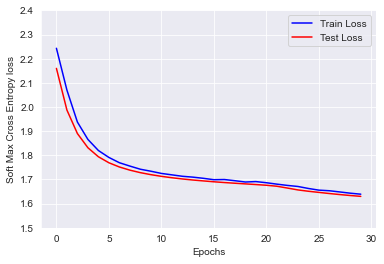

In [20]:
## summarizing and training model for multiple epochs
BATCH_SIZE = 500
EPOCHS = 30
alpha = 0.05

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_pred, labels = y))
train_step = tf.compat.v1.train.GradientDescentOptimizer(alpha).minimize(cross_entropy)

init = tf.compat.v1.global_variables_initializer()

## for dynamic plotting
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Soft Max Cross Entropy loss')
xs, ytrs, ytes = [], [], [] 

## Launch the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    for epoch in range(EPOCHS):
        
        avg_train_cost, avg_test_cost = 0, 0
        
        batches = X_train.shape[0]//BATCH_SIZE
        
        for _ in range(batches):
            
            bs = np.random.choice(X_train.shape[0], size = BATCH_SIZE)
            
            batch_X, batch_y = X_train[bs], y_train_new[bs]

            _, c = sess.run([train_step, cross_entropy], feed_dict= {X: batch_X, y:batch_y})

            avg_train_cost += c
        
        avg_train_cost /= batches
        
        c = sess.run(cross_entropy, feed_dict={X: X_test, y: y_test_new})
        avg_test_cost = c
        
        print ("Epoch:", '%04d' % (epoch+1), "train cost=", "{:.9f}".format(avg_train_cost), "test cost=", "{:.9f}".format(avg_test_cost))
        
        xs.append(epoch)
        ytrs.append(avg_train_cost)
        ytes.append(avg_test_cost)

    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.5, 2.5, step=0.1))

    correct_predictions = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    print(sess.run(accuracy, feed_dict={X: X_test, y: y_test_new}))
    
print(sess._closed)

## Using Multilayer Perceptron(MLP)

In [16]:
## reset backend
tf.keras.backend.clear_session()

## Clear graph
# tf.compat.v1.get_default_graph

In [17]:
## Network parameters
n_input = X_train.shape[1]
n_hidden_1 = 512
n_hidden_2 = 128
n_class = 10

In [18]:
## define placeholders and variables

X = tf.compat.v1.placeholder(tf.float32, [None, n_input])
y = tf.compat.v1.placeholder(tf.float32, [None, n_class])

w_sigmoid = {
                 'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1], 
                                                    mean = 0, 
                                                    stddev= math.sqrt(2/(n_input + n_hidden_1)))),
                 'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2], 
                                                    mean = 0, 
                                                    stddev= math.sqrt(2/(n_hidden_1 + n_hidden_2)))),
                 'out': tf.Variable(tf.random.normal([n_hidden_2, n_class], 
                                                    mean = 0, 
                                                stddev= math.sqrt(2/(n_hidden_2 + n_class))))
            }

w_relu = {
             'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1], 
                                                    mean = 0, 
                                                    stddev= math.sqrt(2/n_input))),
             'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2], 
                                                mean = 0, 
                                                stddev= math.sqrt(2/n_hidden_1))),
             'out': tf.Variable(tf.random.normal([n_hidden_2, n_class], 
                                                mean = 0, 
                                            stddev= math.sqrt(2/n_hidden_2)))
        }

b = {
        'b1': tf.Variable(tf.random.normal([n_hidden_1])),
        'b2': tf.Variable(tf.random.normal([n_hidden_2])),
        'out': tf.Variable(tf.random.normal([n_class]))
    }

In [19]:
## Hyperparameters

BATCH_SIZE = 128
EPOCHS = 15
alpha = 0.001

In [20]:
## Create MLP model
def multilayer_perceptron_model(X, W, b, activation = 'sigmoid'):
    print('Input Layer:', X.get_shape(), '  weights:', W['h1'].get_shape(), '  bias:', b['b1'].get_shape())
    
    layer_1 = tf.add(tf.matmul(X, W['h1']), b['b1'])
    if activation == 'relu':
        layer_1 = tf.nn.relu(layer_1)
    else:
        layer_1 = tf.nn.sigmoid(layer_1)
    
    print('Layer 1:', layer_1.get_shape(), '  weights:', W['h2'].get_shape(), '  bias:', b['b2'].get_shape())

    layer_2 = tf.add(tf.matmul(layer_1, W['h2']), b['b2'])    
    if activation == 'relu':
        layer_2 = tf.nn.relu(layer_2)
    else:
        layer_2 = tf.nn.sigmoid(layer_2)
        
    print('Layer 2:', layer_2.get_shape(), '  weights:', W['out'].get_shape(), '  bias:', b['out'].get_shape())
    
    out_layer = tf.add(tf.matmul(layer_2, W['out']), b['out'])
    print('Output Layer:', out_layer.get_shape())
    
    return out_layer


### Model 1: Using Sigmoid Activation units in hidden layers

#### Model Architecture
**Model 1:** **`input (784) - sigmoid(512) - sigmoid(128) - softmax(output 10)`**


#### Loss & Optimizers

In [23]:
## Sigmoid activation
y_pred_sigmoid = multilayer_perceptron_model(X, w_sigmoid, b)

## Cost
cost_sigmoid = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= y, logits= y_pred_sigmoid))

## Optimizer Gradient Descent
optimizer_sgd = tf.compat.v1.train.GradientDescentOptimizer(alpha).minimize(cost_sigmoid)

## Optimizer Adam
optimizer_adam = tf.compat.v1.train.AdamOptimizer(alpha).minimize(cost_sigmoid)

Input Layer: (None, 784)   weights: (784, 512)   bias: (512,)
Layer 1: (None, 512)   weights: (512, 128)   bias: (128,)
Layer 2: (None, 128)   weights: (128, 10)   bias: (10,)
Output Layer: (None, 10)


#### Launch Graph using Gradient Descent optimizer

2023-06-21 21:35:24.501192: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Epoch: 0001 Train cost= 2.494860861 Test cost= 2.325962543
Epoch: 0002 Train cost= 2.302866829 Test cost= 2.292889357
Epoch: 0003 Train cost= 2.290329572 Test cost= 2.288133621
Epoch: 0004 Train cost= 2.286823916 Test cost= 2.284200430
Epoch: 0005 Train cost= 2.282818856 Test cost= 2.280150890
Epoch: 0006 Train cost= 2.278769400 Test cost= 2.276359320
Epoch: 0007 Train cost= 2.275018581 Test cost= 2.272070646
Epoch: 0008 Train cost= 2.270984139 Test cost= 2.267893553
Epoch: 0009 Train cost= 2.266683242 Test cost= 2.263626337
Epoch: 0010 Train cost= 2.261600945 Test cost= 2.259300709
Epoch: 0011 Train cost= 2.257624795 Test cost= 2.254951954
Epoch: 0012 Train cost= 2.253919951 Test cost= 2.250219584
Epoch: 0013 Train cost= 2.248755557 Test cost= 2.245692492
Epoch: 0014 Train cost= 2.244452756 Test cost= 2.240900278
Epoch: 0015 Train cost= 2.239074856 Test cost= 2.235706329
Test accuracy:  0.3829


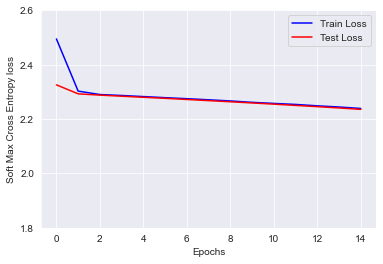

In [24]:

## Initialize global variables
init = tf.compat.v1.global_variables_initializer()

## Launch the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('Epochs') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []

    for epoch in range(EPOCHS):
        
        train_avg_cost, test_avg_cost = 0, 0
        
        batches = X_train.shape[0]//BATCH_SIZE
        
        for _ in range(batches):
            
            bs = np.random.choice(X_train.shape[0], size = BATCH_SIZE)
            batch_X, batch_y = X_train[bs], y_train_new[bs]
            
            _, c, weights = sess.run([optimizer_sgd, cost_sigmoid, w_sigmoid], feed_dict= {X: batch_X, y: batch_y}) 
            train_avg_cost += c
            
        train_avg_cost /= batches
        
        c = sess.run(cost_sigmoid, feed_dict={X: X_test, y: y_test_new})
        test_avg_cost = c
        
        print("Epoch:", '%04d' % (epoch+1), "Train cost=", "{:.9f}".format(train_avg_cost), "Test cost=", "{:.9f}".format(test_avg_cost))
        
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)

    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.8, 2.8, step=0.2), "Input-Sigmoid(512)-Sigmoid(128)-Softmax(output) using Gradient Descent Optimizer")

    correct_pred = tf.equal(tf.argmax(y_pred_sigmoid, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Test accuracy: ", sess.run(accuracy, feed_dict={X: X_test, y: y_test_new}))
                            

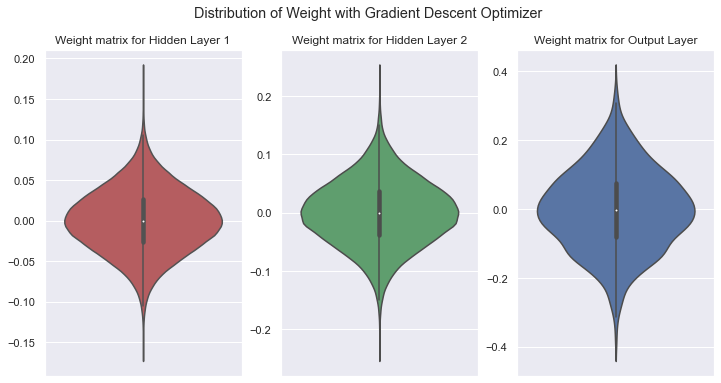

In [25]:
## Inspecting distribution of weights

h1_weights = weights['h1'].flatten()
h2_weights = weights['h2'].flatten()
out_weights = weights['out'].flatten()

sns.set(rc={'figure.figsize':(12,6)})
# plot weight distribution at the end of training
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.violinplot(y = h1_weights, color = 'r', ax = ax1)
ax1.set_title('Weight matrix for Hidden Layer 1')

sns.violinplot(y = h2_weights, color = 'g', ax = ax2)
ax2.set_title('Weight matrix for Hidden Layer 2')

sns.violinplot(y = out_weights, color = 'b', ax = ax3)
ax3.set_title('Weight matrix for Output Layer')

fig.suptitle('Distribution of Weight with Gradient Descent Optimizer')
plt.show()

#### Launch Graph using Adam optimizer

Epoch: 0001 Train cost= 0.569187433 Test cost= 0.256319106
Epoch: 0002 Train cost= 0.217522338 Test cost= 0.184828743
Epoch: 0003 Train cost= 0.159061498 Test cost= 0.147721782
Epoch: 0004 Train cost= 0.119178863 Test cost= 0.123621218
Epoch: 0005 Train cost= 0.094902310 Test cost= 0.105313867
Epoch: 0006 Train cost= 0.075038796 Test cost= 0.092395887
Epoch: 0007 Train cost= 0.059956400 Test cost= 0.080449112
Epoch: 0008 Train cost= 0.047243023 Test cost= 0.075657107
Epoch: 0009 Train cost= 0.038122504 Test cost= 0.068966553
Epoch: 0010 Train cost= 0.032107512 Test cost= 0.067558043
Epoch: 0011 Train cost= 0.025201062 Test cost= 0.067454889
Epoch: 0012 Train cost= 0.021139459 Test cost= 0.062232189
Epoch: 0013 Train cost= 0.016943867 Test cost= 0.064472839
Epoch: 0014 Train cost= 0.012818959 Test cost= 0.062338024
Epoch: 0015 Train cost= 0.010830819 Test cost= 0.063938268
Test accuracy:  0.9805


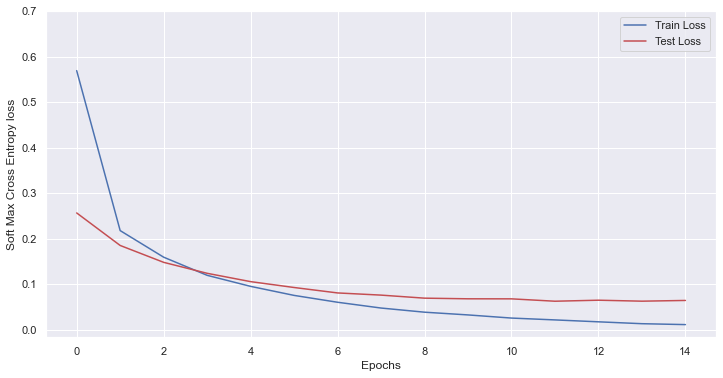

In [33]:
## Initialize global variables
init = tf.compat.v1.global_variables_initializer()

## Launch the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('Epochs') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []

    for epoch in range(EPOCHS):
        
        train_avg_cost, test_avg_cost = 0, 0
        
        batches = X_train.shape[0]//BATCH_SIZE
        
        for _ in range(batches):
            
            bs = np.random.choice(X_train.shape[0], size = BATCH_SIZE)
            batch_X, batch_y = X_train[bs], y_train_new[bs]
            
            _, c, weights = sess.run([optimizer_adam, cost, w_sigmoid], feed_dict= {X: batch_X, y: batch_y}) 
            train_avg_cost += c
            
        train_avg_cost /= batches
        
        c = sess.run(cost, feed_dict={X: X_test, y: y_test_new})
        test_avg_cost = c
        
        print("Epoch:", '%04d' % (epoch+1), "Train cost=", "{:.9f}".format(train_avg_cost), "Test cost=", "{:.9f}".format(test_avg_cost))
        
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)

    plt_dynamic(xs, ytrs, ytes, ax, np.arange(0, 0.8, step=0.1), "Input-Sigmoid(512)-Sigmoid(128)-Softmax(output) using Adam Optimizer")

    correct_pred = tf.equal(tf.argmax(y_pred_sigmoid, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Test accuracy: ", sess.run(accuracy, feed_dict={X: X_test, y: y_test_new}))
                            

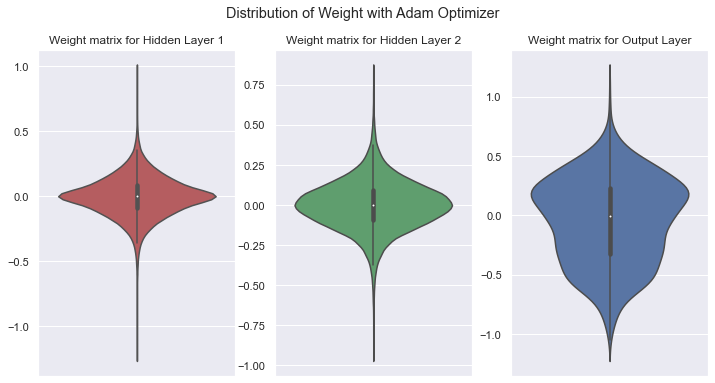

In [34]:
## Inspecting distribution of weights

h1_weights = weights['h1'].flatten()
h2_weights = weights['h2'].flatten()
out_weights = weights['out'].flatten()

sns.set(rc={'figure.figsize':(12,6)})
# plot weight distribution at the end of training
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.violinplot(y = h1_weights, color = 'r', ax = ax1)
ax1.set_title('Weight matrix for Hidden Layer 1')

sns.violinplot(y = h2_weights, color = 'g', ax = ax2)
ax2.set_title('Weight matrix for Hidden Layer 2')

sns.violinplot(y = out_weights, color = 'b', ax = ax3)
ax3.set_title('Weight matrix for Output Layer')

fig.suptitle('Distribution of Weight with Adam Optimizer')
plt.show()

### Model 2: Using ReLU Activation units in hidden layers

#### Model Architecture
**Model 1:** **`input (784) - relu(512) - relu(128) - softmax(output 10)`**


#### Loss & Optimizers

In [21]:
## ReLU activation
y_pred_relu = multilayer_perceptron_model(X, w_relu, b, activation= 'relu')

## Cost
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= y, logits= y_pred_relu))

## Optimizer Gradient Descent
optimizer_sgd = tf.compat.v1.train.GradientDescentOptimizer(alpha).minimize(cost_relu)

## Optimizer Adam
optimizer_adam = tf.compat.v1.train.AdamOptimizer(alpha).minimize(cost_relu)

Input Layer: (None, 784)   weights: (784, 512)   bias: (512,)
Layer 1: (None, 512)   weights: (512, 128)   bias: (128,)
Layer 2: (None, 128)   weights: (128, 10)   bias: (10,)
Output Layer: (None, 10)


#### Launch Graph using Gradient Descent optimizer

2023-06-21 21:37:08.914455: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Epoch: 0001 Train cost= 2.044977264 Test cost= 1.673469782
Epoch: 0002 Train cost= 1.459740061 Test cost= 1.238815784
Epoch: 0003 Train cost= 1.120762472 Test cost= 0.978795111
Epoch: 0004 Train cost= 0.917076665 Test cost= 0.819046497
Epoch: 0005 Train cost= 0.786582460 Test cost= 0.713453054
Epoch: 0006 Train cost= 0.691677344 Test cost= 0.640916467
Epoch: 0007 Train cost= 0.634027310 Test cost= 0.587867081
Epoch: 0008 Train cost= 0.585787031 Test cost= 0.546425462
Epoch: 0009 Train cost= 0.546717995 Test cost= 0.514789939
Epoch: 0010 Train cost= 0.518992353 Test cost= 0.488853723
Epoch: 0011 Train cost= 0.502467439 Test cost= 0.467506647
Epoch: 0012 Train cost= 0.470757897 Test cost= 0.450067580
Epoch: 0013 Train cost= 0.467542177 Test cost= 0.434956968
Epoch: 0014 Train cost= 0.447468699 Test cost= 0.422415733
Epoch: 0015 Train cost= 0.436951162 Test cost= 0.410601109
Test accuracy:  0.8876


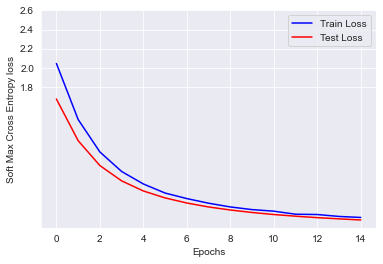

In [22]:
## Initialize global variables
init = tf.compat.v1.global_variables_initializer()

## Launch the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('Epochs') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []

    for epoch in range(EPOCHS):
        
        train_avg_cost, test_avg_cost = 0, 0
        
        batches = X_train.shape[0]//BATCH_SIZE
        
        for _ in range(batches):
            
            bs = np.random.choice(X_train.shape[0], size = BATCH_SIZE)
            batch_X, batch_y = X_train[bs], y_train_new[bs]
            
            _, c, weights = sess.run([optimizer_sgd, cost_relu, w_relu], feed_dict= {X: batch_X, y: batch_y}) 
            train_avg_cost += c
            
        train_avg_cost /= batches
        
        c = sess.run(cost_relu, feed_dict={X: X_test, y: y_test_new})
        test_avg_cost = c
        
        print("Epoch:", '%04d' % (epoch+1), "Train cost=", "{:.9f}".format(train_avg_cost), "Test cost=", "{:.9f}".format(test_avg_cost))
        
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)

    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.8, 2.8, step=0.2), "Input-ReLU(512)-ReLU(128)-Softmax(output) using Gradient Descent Optimizer")

    correct_pred = tf.equal(tf.argmax(y_pred_relu, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Test accuracy: ", sess.run(accuracy, feed_dict={X: X_test, y: y_test_new}))
                            

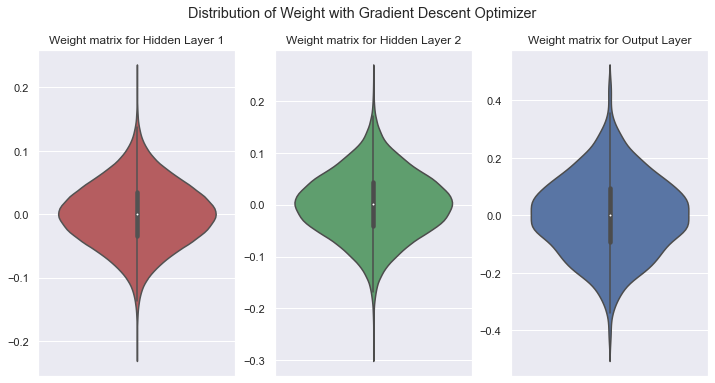

In [40]:
## Inspecting distribution of weights

h1_weights = weights['h1'].flatten()
h2_weights = weights['h2'].flatten()
out_weights = weights['out'].flatten()

sns.set(rc={'figure.figsize':(12,6)})
# plot weight distribution at the end of training
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.violinplot(y = h1_weights, color = 'r', ax = ax1)
ax1.set_title('Weight matrix for Hidden Layer 1')

sns.violinplot(y = h2_weights, color = 'g', ax = ax2)
ax2.set_title('Weight matrix for Hidden Layer 2')

sns.violinplot(y = out_weights, color = 'b', ax = ax3)
ax3.set_title('Weight matrix for Output Layer')

fig.suptitle('Distribution of Weight with Gradient Descent Optimizer')
plt.show()

#### Launch Graph using Adam optimizer

Epoch: 0001 Train cost= 0.291499510 Test cost= 0.148232952
Epoch: 0002 Train cost= 0.091366114 Test cost= 0.093829595
Epoch: 0003 Train cost= 0.058553432 Test cost= 0.084907383
Epoch: 0004 Train cost= 0.042430212 Test cost= 0.070495397
Epoch: 0005 Train cost= 0.031837775 Test cost= 0.079965599
Epoch: 0006 Train cost= 0.023749318 Test cost= 0.072018623
Epoch: 0007 Train cost= 0.022072689 Test cost= 0.084158108
Epoch: 0008 Train cost= 0.018261373 Test cost= 0.076957107
Epoch: 0009 Train cost= 0.013823950 Test cost= 0.066023350
Epoch: 0010 Train cost= 0.013213299 Test cost= 0.078506976
Epoch: 0011 Train cost= 0.010714310 Test cost= 0.075060569
Epoch: 0012 Train cost= 0.008866655 Test cost= 0.079386510
Epoch: 0013 Train cost= 0.008270404 Test cost= 0.086328775
Epoch: 0014 Train cost= 0.008900777 Test cost= 0.087127663
Epoch: 0015 Train cost= 0.011936830 Test cost= 0.079402871
Test accuracy:  0.9818


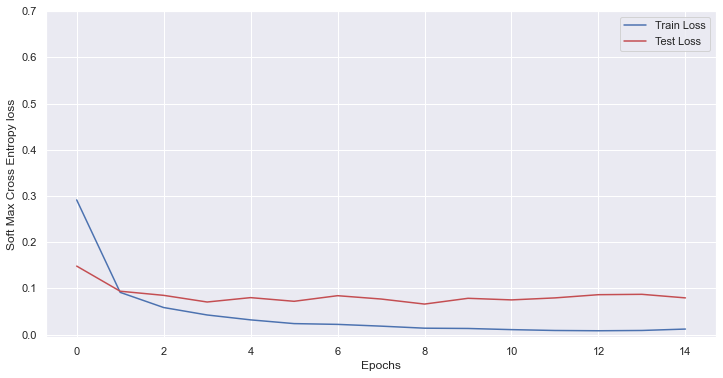

In [41]:
## Initialize global variables
init = tf.compat.v1.global_variables_initializer()

## Launch the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('Epochs') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []

    for epoch in range(EPOCHS):
        
        train_avg_cost, test_avg_cost = 0, 0
        
        batches = X_train.shape[0]//BATCH_SIZE
        
        for _ in range(batches):
            
            bs = np.random.choice(X_train.shape[0], size = BATCH_SIZE)
            batch_X, batch_y = X_train[bs], y_train_new[bs]
            
            _, c, weights = sess.run([optimizer_adam, cost, w_relu], feed_dict= {X: batch_X, y: batch_y}) 
            train_avg_cost += c
            
        train_avg_cost /= batches
        
        c = sess.run(cost, feed_dict={X: X_test, y: y_test_new})
        test_avg_cost = c
        
        print("Epoch:", '%04d' % (epoch+1), "Train cost=", "{:.9f}".format(train_avg_cost), "Test cost=", "{:.9f}".format(test_avg_cost))
        
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)

    plt_dynamic(xs, ytrs, ytes, ax, np.arange(0, 0.8, step=0.1), "Input-ReLU(512)-ReLU(128)-Softmax(output) using Adam Optimizer")

    correct_pred = tf.equal(tf.argmax(y_pred_relu, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Test accuracy: ", sess.run(accuracy, feed_dict={X: X_test, y: y_test_new}))
                            

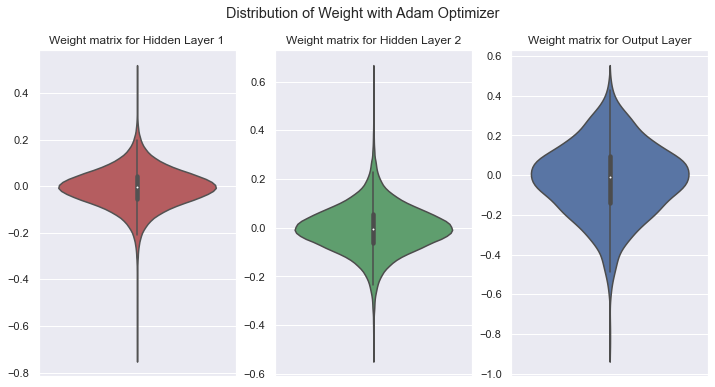

In [42]:
## Inspecting distribution of weights

h1_weights = weights['h1'].flatten()
h2_weights = weights['h2'].flatten()
out_weights = weights['out'].flatten()

sns.set(rc={'figure.figsize':(12,6)})
# plot weight distribution at the end of training
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.violinplot(y = h1_weights, color = 'r', ax = ax1)
ax1.set_title('Weight matrix for Hidden Layer 1')

sns.violinplot(y = h2_weights, color = 'g', ax = ax2)
ax2.set_title('Weight matrix for Hidden Layer 2')

sns.violinplot(y = out_weights, color = 'b', ax = ax3)
ax3.set_title('Weight matrix for Output Layer')

fig.suptitle('Distribution of Weight with Adam Optimizer')
plt.show()

### Model 3: Using ReLU Activation units in hidden layers with Batch Normalization

#### Model Architecture
**`input (784) - ReLU(512) - BatchNonmalization(512) - ReLU(128) - BatchNonmalization(128) - softmax(output 10)`**

In [21]:
## Create MLP model with BN
## BN after activation

eps = 1e-3

def multilayer_perceptron_model_bn(X, W, b, activation = 'sigmoid'):
    print('Input Layer:', X.get_shape(), '  weights:', W['h1'].get_shape(), '  bias:', b['b1'].get_shape())
    
    layer_1 = tf.add(tf.matmul(X, W['h1']), b['b1'])
    if activation == 'relu':
        layer_1 = tf.nn.relu(layer_1)
    else:
        layer_1 = tf.nn.sigmoid(layer_1)
        
    ## BN layer 1
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1, axes=[0])
    n1 = layer_1.get_shape()[1]
    scale_1, offset_1 = tf.Variable(tf.ones([n1])), tf.Variable(tf.zeros([n1]))
    
    bn_1 = tf.nn.batch_normalization(layer_1, 
                                     mean = batch_mean_1, 
                                     variance= batch_var_1, 
                                     scale=scale_1, 
                                     offset= offset_1, 
                                     variance_epsilon = eps)
    
    print('Layer 1:', bn_1.get_shape(), '  weights:', W['h2'].get_shape(), '  bias:', b['b2'].get_shape())

    layer_2 = tf.add(tf.matmul(bn_1, W['h2']), b['b2'])    
    if activation == 'relu':
        layer_2 = tf.nn.relu(layer_2)
    else:
        layer_2 = tf.nn.sigmoid(layer_2)
    
    ## BN layer 2
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2, axes=[0])
    n2 = layer_2.get_shape()[1]
    scale_2, offset_2 = tf.Variable(tf.ones([n2])), tf.Variable(tf.zeros([n2]))
    
    bn_2 = tf.nn.batch_normalization(layer_2, 
                                     mean = batch_mean_2, 
                                     variance= batch_var_2, 
                                     scale=scale_2, 
                                     offset= offset_2,
                                     variance_epsilon = eps)
    
    
    print('Layer 2:', bn_2.get_shape(), '  weights:', W['out'].get_shape(), '  bias:', b['out'].get_shape())
    
    out_layer = tf.add(tf.matmul(bn_2, W['out']), b['out'])
    print('Output Layer:', out_layer.get_shape())
    
    return out_layer

#### Loss & Optimizers

In [22]:
## ReLU activation
y_pred_relu = multilayer_perceptron_model_bn(X, w_relu, b, activation= 'relu')

## Cost
cost_bn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= y, logits= y_pred_relu))

## Optimizer Adam
optimizer_adam_bn = tf.compat.v1.train.AdamOptimizer(alpha).minimize(cost_bn)

Input Layer: (None, 784)   weights: (784, 512)   bias: (512,)
Layer 1: (None, 512)   weights: (512, 128)   bias: (128,)
Layer 2: (None, 128)   weights: (128, 10)   bias: (10,)
Output Layer: (None, 10)


#### Launch Graph using Adam optimizer

2023-06-21 21:38:46.914204: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Epoch: 0001 Train cost= 0.198468556 Test cost= 0.108016394
Epoch: 0002 Train cost= 0.076468443 Test cost= 0.082295440
Epoch: 0003 Train cost= 0.049250066 Test cost= 0.078173257
Epoch: 0004 Train cost= 0.041430539 Test cost= 0.068369508
Epoch: 0005 Train cost= 0.031355613 Test cost= 0.064503416
Epoch: 0006 Train cost= 0.026461956 Test cost= 0.068945959
Epoch: 0007 Train cost= 0.021742054 Test cost= 0.066637993
Epoch: 0008 Train cost= 0.017912330 Test cost= 0.074411109
Epoch: 0009 Train cost= 0.019175242 Test cost= 0.067845799
Epoch: 0010 Train cost= 0.014084417 Test cost= 0.067455061
Epoch: 0011 Train cost= 0.012521662 Test cost= 0.064112827
Epoch: 0012 Train cost= 0.013550217 Test cost= 0.073962070
Epoch: 0013 Train cost= 0.012680915 Test cost= 0.077578858
Epoch: 0014 Train cost= 0.011445691 Test cost= 0.072036475
Epoch: 0015 Train cost= 0.009431804 Test cost= 0.076436050
Test accuracy:  0.981


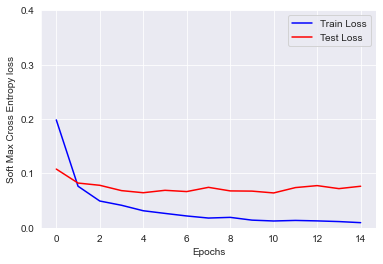

In [23]:
## Initialize global variables
init = tf.compat.v1.global_variables_initializer()

## Launch the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('Epochs') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []

    for epoch in range(EPOCHS):
        
        train_avg_cost, test_avg_cost = 0, 0
        
        batches = X_train.shape[0]//BATCH_SIZE
        
        for _ in range(batches):
            
            bs = np.random.choice(X_train.shape[0], size = BATCH_SIZE)
            batch_X, batch_y = X_train[bs], y_train_new[bs]
            
            _, c, weights = sess.run([optimizer_adam_bn, cost_bn, w_relu], feed_dict= {X: batch_X, y: batch_y}) 
            train_avg_cost += c
            
        train_avg_cost /= batches
        
        c = sess.run(cost_bn, feed_dict={X: X_test, y: y_test_new})
        test_avg_cost = c
        
        print("Epoch:", '%04d' % (epoch+1), "Train cost=", "{:.9f}".format(train_avg_cost), "Test cost=", "{:.9f}".format(test_avg_cost))
        
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)

    plt_dynamic(xs, ytrs, ytes, ax, np.arange(0, 0.5, step=0.1), 
                                "Input-ReLU(BatchNormalization(512))-ReLU(BatchNormalization(128))-Softmax(output) using AdamOptimizer")


    correct_pred = tf.equal(tf.argmax(y_pred_relu, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Test accuracy: ", sess.run(accuracy, feed_dict={X: X_test, y: y_test_new}))
                            

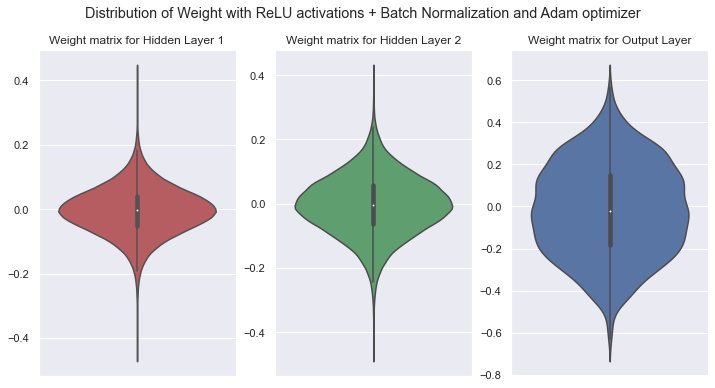

In [24]:
h1_weights = weights['h1'].flatten()
h2_weights = weights['h2'].flatten()
out_weights = weights['out'].flatten()

sns.set(rc={'figure.figsize':(12,6)})
# plot weight distribution at the end of training
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.violinplot(y = h1_weights, color = 'r', ax = ax1)
ax1.set_title('Weight matrix for Hidden Layer 1')

sns.violinplot(y = h2_weights, color = 'g', ax = ax2)
ax2.set_title('Weight matrix for Hidden Layer 2')

sns.violinplot(y = out_weights, color = 'b', ax = ax3)
ax3.set_title('Weight matrix for Output Layer')

fig.suptitle('Distribution of Weight with ReLU activations + Batch Normalization and Adam optimizer')
plt.show()

### Model 4: Using ReLU Activation units in hidden layers with Dropout

#### Model Architecture
**`input (784) - ReLU(512) - Dropout - ReLU(128) - Dropout - softmax(output 10)`**


In [26]:
in_p = tf.compat.v1.placeholder(tf.float32, name = "input_prob")
p =  tf.compat.v1.placeholder(tf.float32, name = "prob")

In [32]:
## Create MLP model
def multilayer_perceptron_with_dropout(X, W, b, activation = 'sigmoid'):
    print('Input Layer:', X.get_shape(), '  weights:', W['h1'].get_shape(), '  bias:', b['b1'].get_shape())
    
    layer_1 = tf.add(tf.matmul(X, W['h1']), b['b1'])
    if activation == 'relu':
        layer_1 = tf.nn.relu(layer_1)
    else:
        layer_1 = tf.nn.sigmoid(layer_1)
    
    layer_1 = tf.nn.dropout(layer_1, rate = in_p)
    print('Layer 1:', layer_1.get_shape(), '  weights:', W['h2'].get_shape(), '  bias:', b['b2'].get_shape())

    layer_2 = tf.add(tf.matmul(layer_1, W['h2']), b['b2'])    
    if activation == 'relu':
        layer_2 = tf.nn.relu(layer_2)
    else:
        layer_2 = tf.nn.sigmoid(layer_2)
    
    layer_2 = tf.nn.dropout(layer_2, rate = p)
    print('Layer 2:', layer_2.get_shape(), '  weights:', W['out'].get_shape(), '  bias:', b['out'].get_shape())
    
    out_layer = tf.add(tf.matmul(layer_2, W['out']), b['out'])
    print('Output Layer:', out_layer.get_shape())
    
    return out_layer


In [33]:
y_pred_d = multilayer_perceptron_with_dropout(X, w_relu, b, activation = 'relu')

## Cost
cost_d = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= y, logits= y_pred_d))

## Optimizer
optimizer_adam_d = tf.compat.v1.train.AdamOptimizer(alpha).minimize(cost_d)

Input Layer: (None, 784)   weights: (784, 512)   bias: (512,)
Layer 1: (None, 512)   weights: (512, 128)   bias: (128,)
Layer 2: (None, 128)   weights: (128, 10)   bias: (10,)
Output Layer: (None, 10)


2023-06-21 21:25:46.440595: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Epoch: 0001 Train cost= 0.489432789 Test cost= 0.240917549
Epoch: 0002 Train cost= 0.186401030 Test cost= 0.162738726
Epoch: 0003 Train cost= 0.133142140 Test cost= 0.136167243
Epoch: 0004 Train cost= 0.102039780 Test cost= 0.118781932
Epoch: 0005 Train cost= 0.086417580 Test cost= 0.117768869
Epoch: 0006 Train cost= 0.076140694 Test cost= 0.111825585
Epoch: 0007 Train cost= 0.067119758 Test cost= 0.113133498
Epoch: 0008 Train cost= 0.057346503 Test cost= 0.097669668
Epoch: 0009 Train cost= 0.053375772 Test cost= 0.097010620
Epoch: 0010 Train cost= 0.045919899 Test cost= 0.110097513
Epoch: 0011 Train cost= 0.043069823 Test cost= 0.101228207
Epoch: 0012 Train cost= 0.039298784 Test cost= 0.099654138
Epoch: 0013 Train cost= 0.038369958 Test cost= 0.114514075
Epoch: 0014 Train cost= 0.033088227 Test cost= 0.110002846
Epoch: 0015 Train cost= 0.033052450 Test cost= 0.102861255
Test accuracy:  0.9738


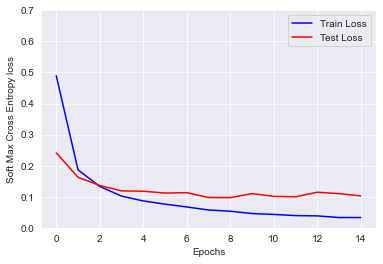

In [35]:
## Initialize global variables
init = tf.compat.v1.global_variables_initializer()

## Launch the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('Epochs') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []

    for epoch in range(EPOCHS):
        
        train_avg_cost, test_avg_cost = 0, 0
        
        batches = X_train.shape[0]//BATCH_SIZE
        
        for _ in range(batches):
            
            bs = np.random.choice(X_train.shape[0], size = BATCH_SIZE)
            batch_X, batch_y = X_train[bs], y_train_new[bs]
            
            _, c, weights = sess.run([optimizer_adam_d, cost_d, w_relu], feed_dict= {X: batch_X, y: batch_y, in_p: 0.2, p: 0.5})
            train_avg_cost += c
            
        train_avg_cost /= batches
        
        c = sess.run(cost_d, feed_dict={X: X_test, y: y_test_new,  in_p: 0.2, p: 0.5})
        test_avg_cost = c
        
        print("Epoch:", '%04d' % (epoch+1), "Train cost=", "{:.9f}".format(train_avg_cost), "Test cost=", "{:.9f}".format(test_avg_cost))
        
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)

    plt_dynamic(xs, ytrs, ytes, ax, np.arange(0, 0.8, step=0.1), "Input-ReLU(512)-Dropout-ReLU(128)-Dropout-Softmax(output) using AdamOptimizer")


    correct_pred = tf.equal(tf.argmax(y_pred_d, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Test accuracy: ", accuracy.eval({X: X_test, y: y_test_new, in_p: 0.2, p: 0.5}))

                            

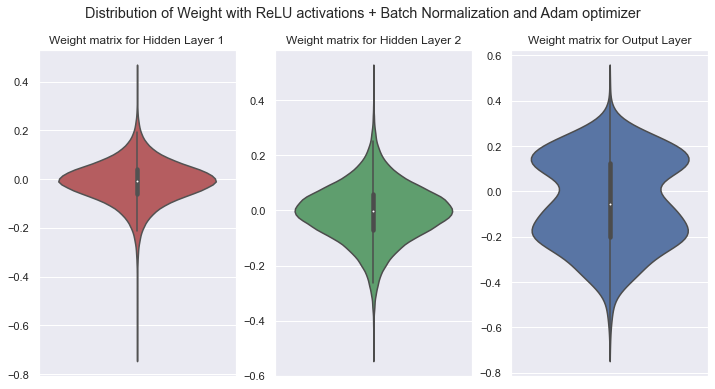

In [36]:
h1_weights = weights['h1'].flatten()
h2_weights = weights['h2'].flatten()
out_weights = weights['out'].flatten()

sns.set(rc={'figure.figsize':(12,6)})
# plot weight distribution at the end of training
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.violinplot(y = h1_weights, color = 'r', ax = ax1)
ax1.set_title('Weight matrix for Hidden Layer 1')

sns.violinplot(y = h2_weights, color = 'g', ax = ax2)
ax2.set_title('Weight matrix for Hidden Layer 2')

sns.violinplot(y = out_weights, color = 'b', ax = ax3)
ax3.set_title('Weight matrix for Output Layer')

fig.suptitle('Distribution of Weight with ReLU activations + Batch Normalization and Adam optimizer')
plt.show()